<h4><b> Logistic Regression modelling for determining probability of Attrition </b></h4>

In [56]:
#importing the required libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap



<h4><b> Data Preprocessing and Model Training </b></h4>

* The modelling.csv will be preprocessed to include only the required features for further modelling
* The imbalance in the dataset will be handled using SMOTE
* Standard scaling will be applied to normalize the numerical features in the dataset
* One-Hot Encoding will be done on categorical columns to convert them into numerical format
* Finally, the LogisticRegression model will be trained using features and the target variable


In [57]:
#Importing the csv file ready for modelling
logreg_df = pd.read_csv('modelling.csv')
logreg_df.head(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,6,1,0,0,3,4,2,3,3,1711
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,3,5,1,4,3,2,4,2,4,1822
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,2,5,0,3,2,2,1,3,3,1697
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,5,8,7,5,4,4,3,2,3,1691
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,2,6,0,4,4,1,3,3,3,1962
5,5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,...,5,7,7,7,3,2,2,3,3,2559
6,6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,...,2,0,0,0,1,3,1,3,4,1606
7,7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,...,2,0,0,0,1,2,3,3,4,1634
8,8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,...,2,9,7,8,2,4,3,3,4,1664
9,9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,...,2,6,1,5,2,1,3,3,3,1657


In [58]:
# Preprocessing the data
logreg_df.drop(columns=['Unnamed: 0', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

#Setting EmployeeID as the index for this dataframe since it won't be used for further analysis
logreg_df.set_index('EmployeeID', inplace=True)

logreg_df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3,4,2,3,3,1711
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,3,2,4,2,4,1822
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,2,2,1,3,3,1697
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,4,4,3,2,3,1691
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,4,1,3,3,3,1962
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,...,5,7,7,7,3,2,2,3,3,2559
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,2,0,0,0,1,3,1,3,4,1606
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,...,2,0,0,0,1,2,3,3,4,1634
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,...,2,9,7,8,2,4,3,3,4,1664


In [59]:
#Performing One-Hot Encoding on categorical variables
logreg_df = pd.get_dummies(logreg_df, drop_first=True, dtype=int)
logreg_df.head(10)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,6,2,1,131160,1,11,0,1,6,...,0,0,0,0,0,0,0,0,1,0
2,31,10,1,1,41890,0,23,1,6,3,...,0,0,0,0,0,1,0,0,0,1
3,32,17,4,4,193280,1,15,3,5,2,...,0,0,0,0,0,0,1,0,1,0
4,38,2,5,3,83210,3,11,3,13,5,...,1,0,0,0,0,0,0,0,1,0
5,32,10,1,1,23420,4,12,2,9,2,...,0,0,0,0,0,0,1,0,0,1
6,46,8,3,4,40710,3,13,0,28,5,...,0,0,0,0,1,0,0,0,1,0
7,28,11,2,2,58130,2,20,1,5,2,...,0,0,0,0,0,0,1,0,0,1
8,29,18,3,2,31430,2,22,3,10,2,...,0,0,0,0,0,0,1,0,1,0
9,31,1,3,3,20440,0,21,0,10,2,...,0,1,0,0,0,0,0,0,1,0


<b> SMOTE analysis - Eliminating Imbalances </b>

Due to imbalance in the dataset, SMOTE has been used to over-sample the minority class labels of the target variable

In [60]:
# Separating the features and the target variable
X = logreg_df.drop(columns='Attrition_Yes')
y = logreg_df['Attrition_Yes']

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [61]:
#Displaying the target variable class labels ratio before applying SMOTE
logreg_df['Attrition_Yes'].value_counts()


Attrition_Yes
0    3699
1     711
Name: count, dtype: int64

In [62]:
#Displaying the target variable class labels ratio after SMOTE
y_resampled.value_counts()

Attrition_Yes
0    3699
1    3699
Name: count, dtype: int64

In [63]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b> Recursive Feature Elimination to identify significant predictors </b>

In [64]:
# Feature selection using RFE
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=12)

In [65]:
# Displaying selected features
selected_features = X.columns[rfe.support_]

print(selected_features)

Index(['TotalWorkingYears', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'TotalWorkingHours',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')


<B> Training and evaluating the LogisticRegression model </B>

In [66]:
# Training logistic regression model with selected features
logreg.fit(X_train_scaled[:, rfe.support_], y_train)

LogisticRegression(solver='liblinear')

In [67]:
# Predicting and evaluating the model
y_pred = logreg.predict(X_test_scaled[:, rfe.support_])
report = classification_report(y_test, y_pred)

In [68]:
print("Classification report:\n",report)

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       759
           1       0.79      0.75      0.77       721

    accuracy                           0.78      1480
   macro avg       0.78      0.78      0.78      1480
weighted avg       0.78      0.78      0.78      1480



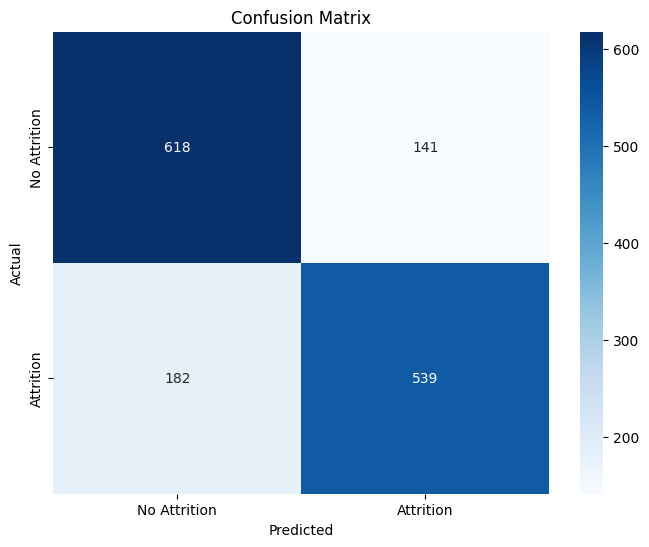

In [69]:
# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h5><b> Model performance analysis </h5></b>

* <b>Precision:</b> The precision for both classes is almost similar (0.78). This implies that the model is able to accurately predict 79% of the instances for both the classes
* <b>Recall:</b> The recall of 0.78 (average) for both the classes suggests that the model correctly identifies 78% of all the actual instances of both the classes, with some True Negative and False Positive cases.
* <b>Accuracy:</b> The LogisticRegression model has predicting accuracy of 78%. The accuracy could have been better if there wasn't imbalance in the dataset.

<h5><b> Analyzing feature importance for the trained model </h5></b>

In [71]:
# Getting the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Creating a DataFrame to display the coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})

# Adding a column for the absolute value of the coefficients to sort by importance
coef_df['Importance'] = np.abs(coef_df['Coefficient'])

# Sorting the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Importance', ascending=False)

print(coef_df)

                              Feature  Coefficient  Importance
7        EducationField_Life Sciences    -1.308496    1.308496
9              EducationField_Medical    -1.294617    1.294617
8            EducationField_Marketing    -0.841480    0.841480
11    EducationField_Technical Degree    -0.833130    0.833130
10               EducationField_Other    -0.662706    0.662706
4                   TotalWorkingHours     0.538708    0.538708
0                   TotalWorkingYears    -0.532418    0.532418
6                    Department_Sales    -0.509583    0.509583
5   Department_Research & Development    -0.504407    0.504407
2                YearsWithCurrManager    -0.464957    0.464957
3             EnvironmentSatisfaction    -0.456483    0.456483
1             YearsSinceLastPromotion     0.428192    0.428192


<h4><b> Summary of Logistic Regression model developed for probability of Attrition </b></h4>

Based on the feature analysis accomplished in the above step, the following inferences can be made:
* <b>TotalWorkingHours:</b> Employees working more hours are likely to leave the organization since the feature value is positively impacting the attrition rate probability
* <b>TotalWorkingYears:</b> Employees that have worked more years are less likely to leave, whereas employees that have lesser working experience have higher probability of leaving this organization
* <b>YearsWithCurrManager:</b> Employees who have worked under the same manager for quite a long span are less likely to leave the organization. It can be said that if an employee gets an internal transfer and experiences a change in the management, there are higher chances of that employee leaving the company
* <b>EnvironmentSatisfaction:</b> The employees are less likely to leave the organization due to work-environment dissatisfaction since the feature value is negatively impacting the attrition rate
* <b>YearsSinceLastPromotion:</b> It can be stated that employees are likely to leave the company if they do not receive promotions over extended periods